<a href="https://colab.research.google.com/github/caglatoprak/Akademik-Performans-Analizi/blob/master/Breast_cancer_wisconsin_(diagnostic)_dataset_Yapay_Sinir_A%C4%9F%C4%B1_ve_Derin_%C3%96%C4%9Frenme_Uygulamas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Meme Kanseri Teşhis Veri Setini Tanıyalım**

Bu veri seti meme kanseri hücrelerinin özelliklerinin tespit edilmesi amacıyla toplanan verilerden oluşur. Her bir özellik bir kanser hücresinin dijital görüntüsünden elde edilmiş ölçümleri ifade eder. Veri setinde 569 örnek ve 30 özellik yer almaktadır. Hedef değişken kanserin iyi huylu mu kötü huylu mu olduğunu gösteren 'M' ve 'B' olarak kodlanmıştır.

# **Amaç**

Amacımız, bu veri seti üzerinde bir yapay sinir ağı ve derin öğrenme uygulaması yapmak olacaktır.



**Öncelikle, gerekli kütüphaneleri import ediyoruz.**

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


 **Veri setini yüklüyoruz**

In [ ]:
data = load_breast_cancer()

X = data.data
y = data.target

**Verileri normalleştiriyoruz.**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


**Veri setini eğitim ve test setlerine ayırıyoruz.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Artık yapay sinir ağımızı ve derin öğrenme modelimizi oluşturabiliriz. ***

**Önce yapay sinir ağına bakalım:**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


**Ardından modelimizi eğitelim:**

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)


Epoch 1/50
31/31 [==============================] - 2s 25ms/step - loss: 0.5364 - accuracy: 0.7368 - val_loss: 0.3769 - val_accuracy: 0.8742
Epoch 2/50
31/31 [==============================] - 0s 9ms/step - loss: 0.2979 - accuracy: 0.9013 - val_loss: 0.2626 - val_accuracy: 0.9073
Epoch 3/50
31/31 [==============================] - 0s 9ms/step - loss: 0.2055 - accuracy: 0.9539 - val_loss: 0.2131 - val_accuracy: 0.9205
Epoch 4/50
31/31 [==============================] - 0s 12ms/step - loss: 0.1595 - accuracy: 0.9605 - val_loss: 0.1860 - val_accuracy: 0.9272
Epoch 5/50
31/31 [==============================] - 0s 13ms/step - loss: 0.1332 - accuracy: 0.9737 - val_loss: 0.1680 - val_accuracy: 0.9404
Epoch 6/50
31/31 [==============================] - 0s 9ms/step - loss: 0.1138 - accuracy: 0.9803 - val_loss: 0.1554 - val_accuracy: 0.9404
Epoch 7/50
31/31 [==============================] - 0s 16ms/step - loss: 0.0996 - accuracy: 0.9836 - val_loss: 0.1464 - val_accuracy: 0.9404
Epoch 8/50
31/31

**Modelimizin performansını değerlendirelim:**

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


4/4 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9737
Accuracy: 97.37


**Şimdi de derin öğrenme modelimizi oluşturalım:**

***Derin öğrenme modeli için ise önce verilerimizi yeniden şekillendirmemiz gerekiyor:***

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


**Ardından derin öğrenme modelimizi oluşturabiliriz:**

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


**Modelimizi eğitelim:**

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)


Epoch 1/50
31/31 [==============================] - 1s 15ms/step - loss: 0.2649 - accuracy: 0.9079 - val_loss: 0.1430 - val_accuracy: 0.9470
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0887 - accuracy: 0.9704 - val_loss: 0.1249 - val_accuracy: 0.9404
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9836 - val_loss: 0.1127 - val_accuracy: 0.9536
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 0.0589 - accuracy: 0.9836 - val_loss: 0.1209 - val_accuracy: 0.9470
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0458 - accuracy: 0.9868 - val_loss: 0.1286 - val_accuracy: 0.9404
Epoch 6/50
31/31 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9901 - val_loss: 0.1430 - val_accuracy: 0.9404
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.9901 - val_loss: 0.1546 - val_accuracy: 0.9404
Epoch 8/50
31/31 [=

**Ve son olarak performansımızı değerlendirelim:**

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


4/4 [==============================] - 0s 8ms/step - loss: 0.1457 - accuracy: 0.9649
Accuracy: 96.49


**Modellerimizin eğitim sürecindeki performansını görmek için ayrı ayrı grafikler**



In [ ]:
import matplotlib.pyplot as plt

**Doğruluk değerlerinin eğitim ve test setleri için değişimini gösteren bir grafik**

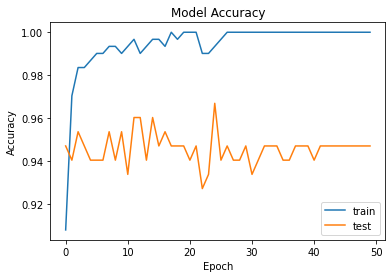

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Kayıp değerlerinin eğitim ve test setleri için değişimini gösteren bir grafik**

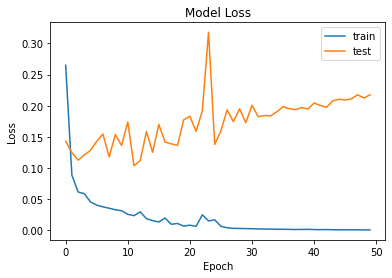

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
